# Sales Conversion Optimization 

### Life cycle of Machine Learning Project
- Understanding the problem statement
- Importing the data
- Cleaning the data
- Univariate Analysis
- Bivariate Analysis
 

## 1).Problem Statement

- This is the data of an anonymous organization's Social Media campaign.
- We are creating a sales coversion prediction model for predicting the conversion rates which helps the organization to
optimize their sales.

- This project will also understand the relationship between conversion rate and other features.


## 2). Data Collection

- Datasource -> https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking/data

## Importing the necessary Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### Shape of dataset

In [3]:
df.shape

(1143, 11)

## Dataset Information
1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

## Data Checks to perform
- Checking missing values
- Checking duplicates
- Checking data types
- Checking the number of unique values in each numerical column
- Checking various value of a categorical column
- Check statistics of data

#### 1. Checking missing values

In [4]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

This data has no null values


#### 2. Checking Duplicates

In [5]:
df.duplicated().sum()

0

- No presence of duplicate data.

#### 3. Checking datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


- 9 numerical features
- 2 categorical features

### 4. Checking Unique values of numerical features

In [7]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

### Checking various columsn of Categorical columns

In [8]:
print("Unique_Values of age: ", df['age'].unique())
print("Unique_Values of gender: ", df['gender'].unique()) 

Unique_Values of age:  ['30-34' '35-39' '40-44' '45-49']
Unique_Values of gender:  ['M' 'F']


- 4 values for age column and 2 features for gender column

### Statistics of the data

In [9]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## Univariate Analysis

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000  


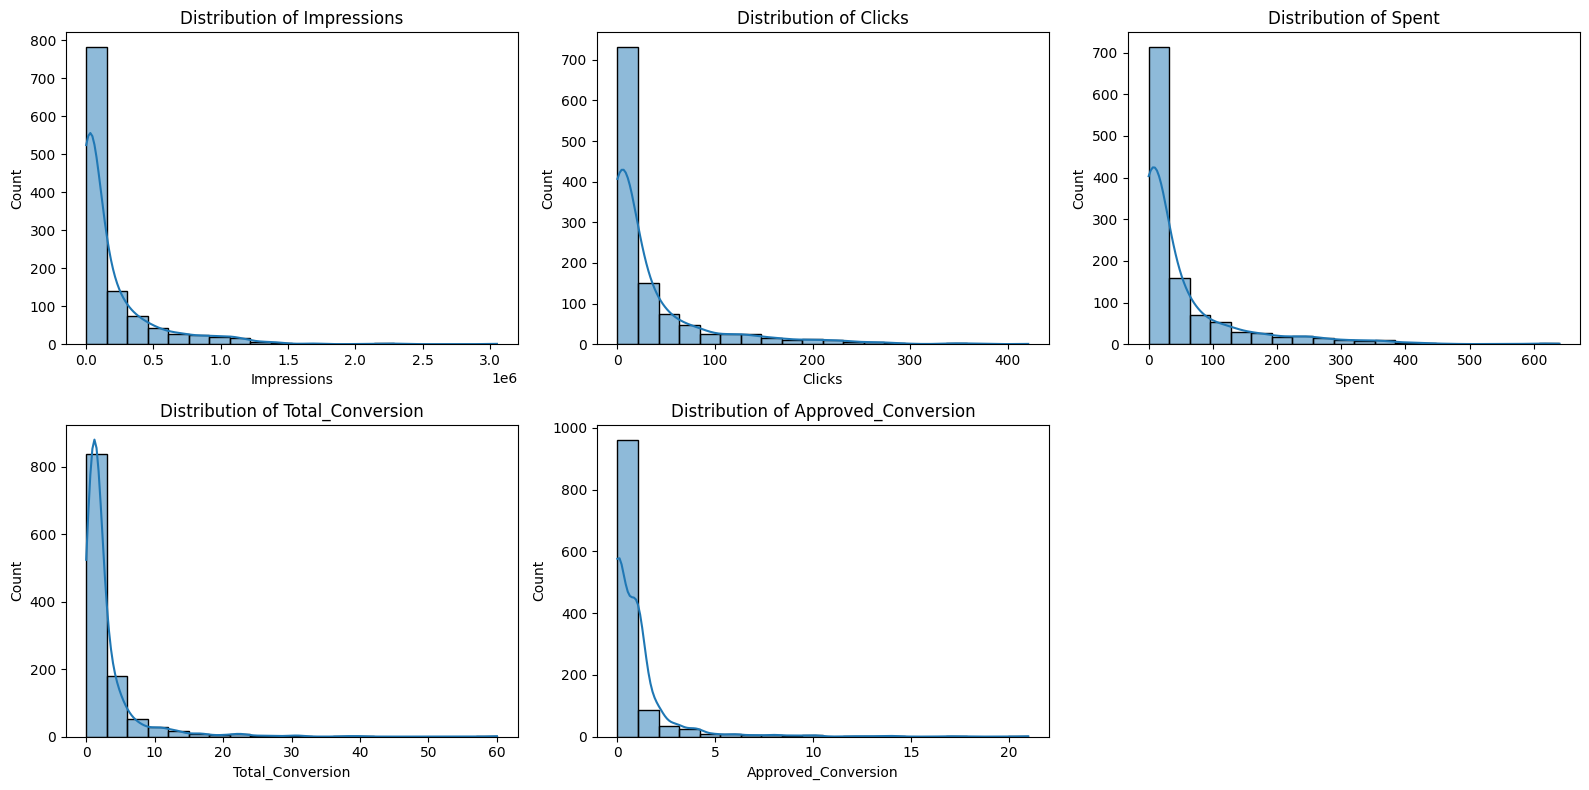

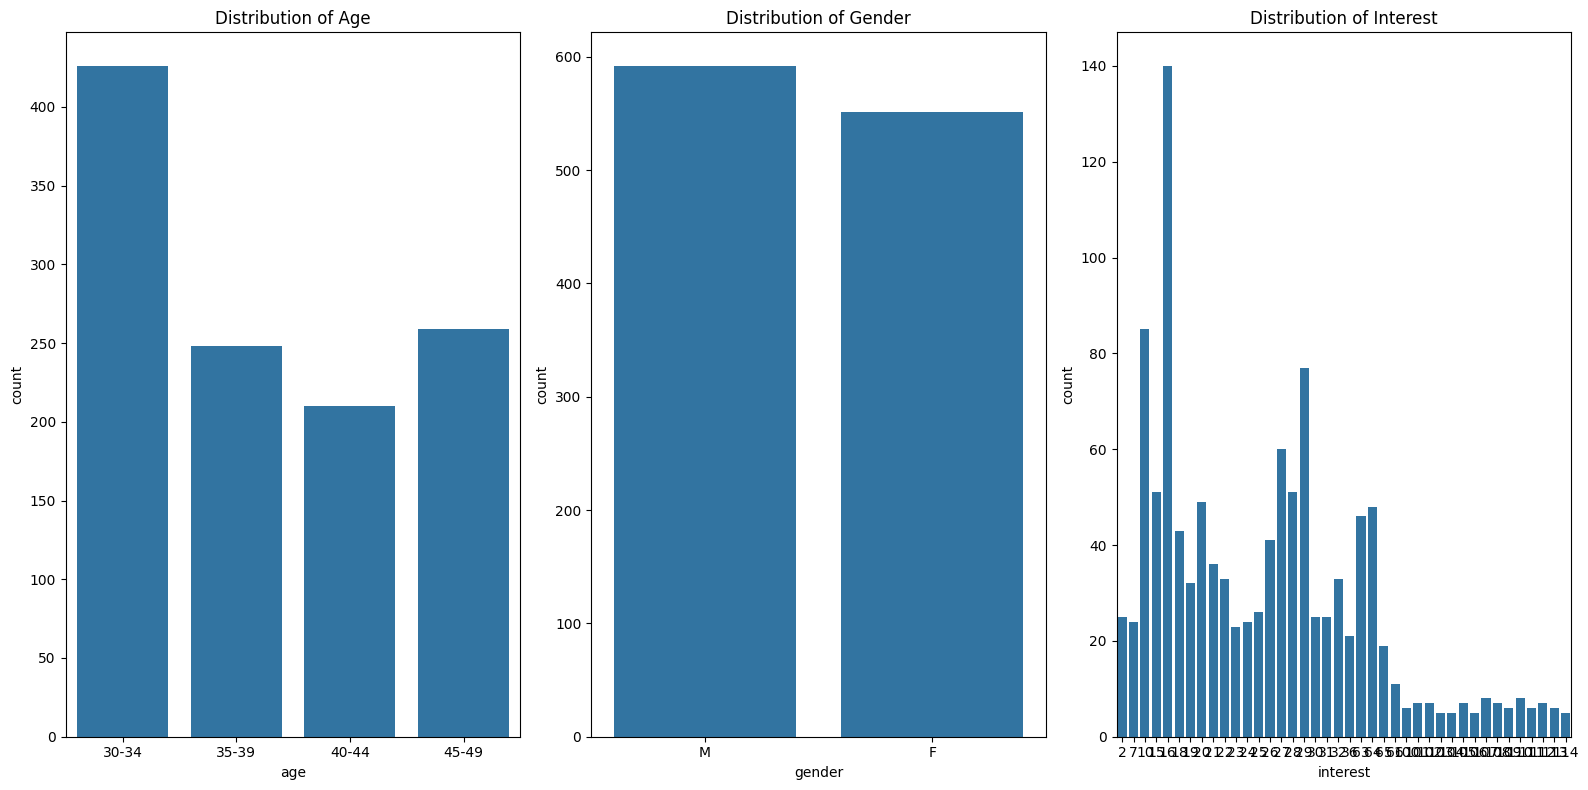

In [10]:
# Summary statistics for numerical variables
print(df[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']].describe())

# Set up the plotting environment
plt.figure(figsize=(16, 8))

# Histograms for numerical variables
plt.subplot(2, 3, 1)
sns.histplot(df['Impressions'], bins=20, kde=True)
plt.title('Distribution of Impressions')

plt.subplot(2, 3, 2)
sns.histplot(df['Clicks'], bins=20, kde=True)
plt.title('Distribution of Clicks')

plt.subplot(2, 3, 3)
sns.histplot(df['Spent'], bins=20, kde=True)
plt.title('Distribution of Spent')

plt.subplot(2, 3, 4)
sns.histplot(df['Total_Conversion'], bins=20, kde=True)
plt.title('Distribution of Total_Conversion')

plt.subplot(2, 3, 5)
sns.histplot(df['Approved_Conversion'], bins=20, kde=True)
plt.title('Distribution of Approved_Conversion')

plt.tight_layout()
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
sns.countplot(x='age', data=df)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')

plt.subplot(1, 3, 3)
sns.countplot(x='interest', data=df)
plt.title('Distribution of Interest')

plt.tight_layout()
plt.show()

#### Observation
- Positive Skewness: All numeric columns exhibit a positive skewness in their distributions.
- Dominant Age Group (30-34): The age group '30-34' has the highest count among all age groups.
- Slight Male Dominance: The count of males is slightly higher than females.

#### Bivariate Analysis

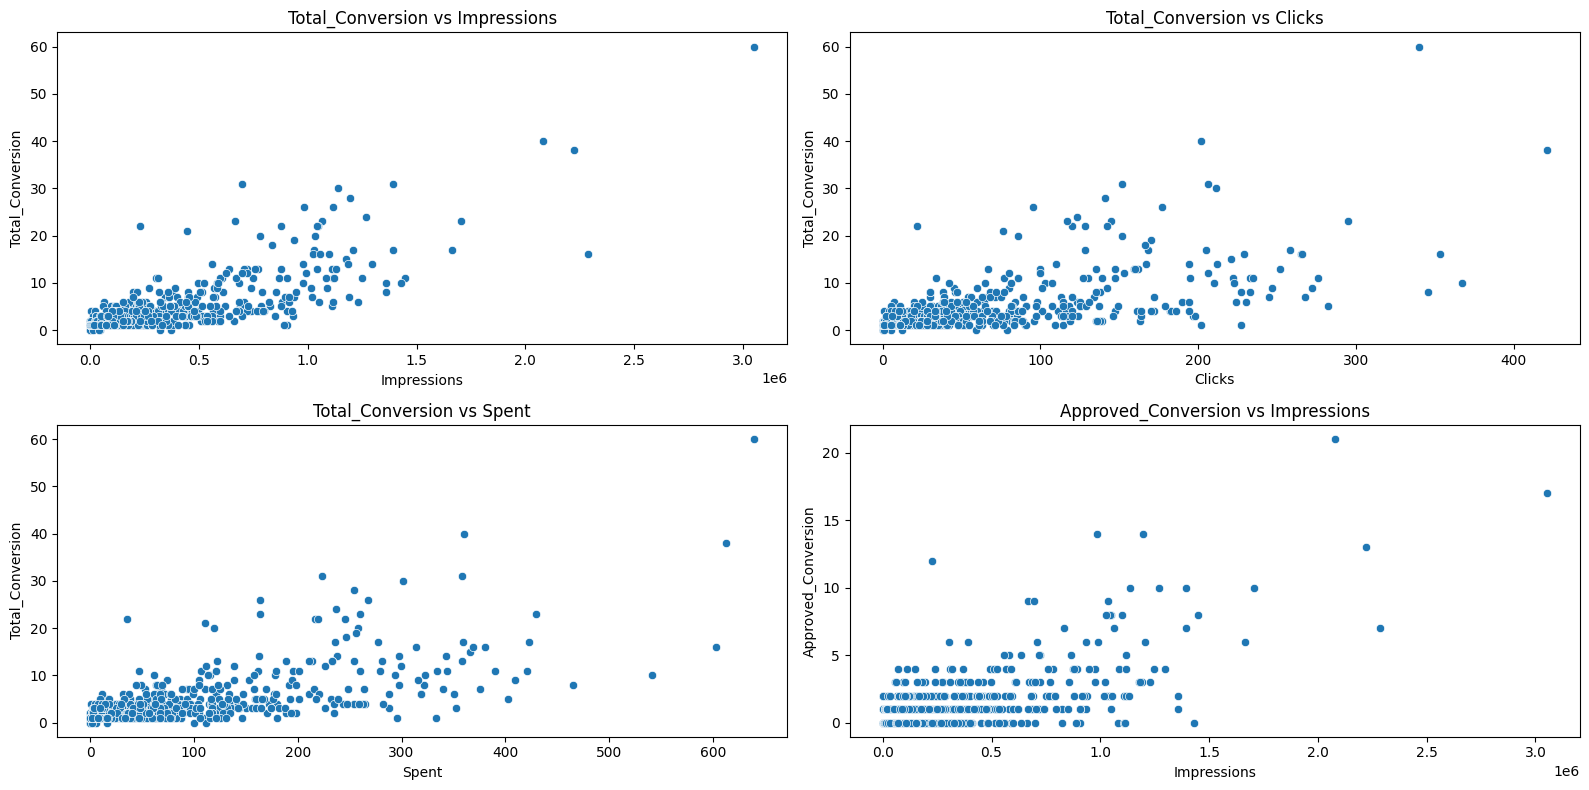

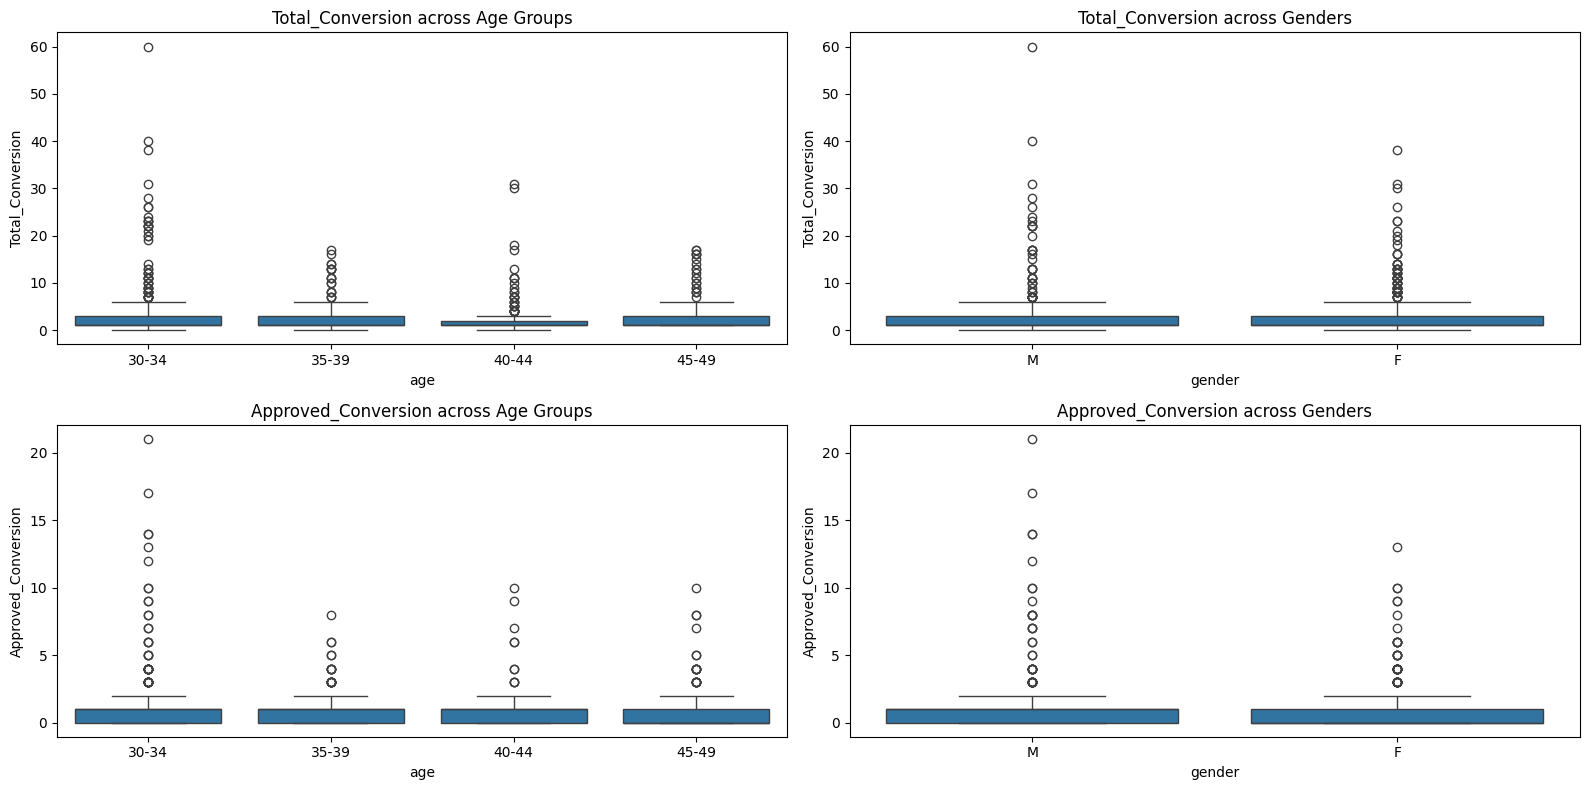

In [11]:
# Scatter plots for numerical variables

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Impressions', y='Total_Conversion', data=df)
plt.title('Total_Conversion vs Impressions')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Clicks', y='Total_Conversion', data=df)
plt.title('Total_Conversion vs Clicks')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Spent', y='Total_Conversion', data=df)
plt.title('Total_Conversion vs Spent')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Impressions', y='Approved_Conversion', data=df)
plt.title('Approved_Conversion vs Impressions')

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='age', y='Total_Conversion', data=df)
plt.title('Total_Conversion across Age Groups')

plt.subplot(2, 2, 2)
sns.boxplot(x='gender', y='Total_Conversion', data=df)
plt.title('Total_Conversion across Genders')

plt.subplot(2, 2, 3)
sns.boxplot(x='age', y='Approved_Conversion', data=df)
plt.title('Approved_Conversion across Age Groups')

plt.subplot(2, 2, 4)
sns.boxplot(x='gender', y='Approved_Conversion', data=df)
plt.title('Approved_Conversion across Genders')

plt.tight_layout()
plt.show()

#### Observation:
##### Scatter plot

1. Total_Conversion vs Impressions
    There is a weak positive correlation between impressions and total conversion. This means that as the number of impressions increases, the total conversion tends to increase as well. However, there are also many data points with high impressions but low total conversion, indicating that impressions are not the only factor that determines total conversion.

2. Total_Conversion vs Clicks
    There is a stronger positive correlation between clicks and total conversion than between impressions and total conversion. This means that clicks are a better predictor of total conversion than impressions.
    
3. Total_Conversion vs Spent
    There is a weak positive correlation between spent and total conversion. 

4. Approved_Conversion vs Impressions
    There is a weak positive correlation between impressions and approved conversion. 

##### Boxplot
Observations of the boxplots:

1. Total_Conversion across Age Groups
    - The median total conversion is highest for the 30-34 age group, followed by the 35-39 age group.
    - The total conversion is more spread out for the 40-44 and 45-49 age groups, indicating that there is greater variability in total conversion for these age groups.
    
2. Total_Conversion across Genders
    - The median total conversion is slightly higher for males than for females.
    - The total conversion is more spread out for males than for females, indicating that there is greater variability in total conversion for males.

3. Approved_Conversion across Age Groups
    - The median approved conversion is highest for the 30-34 age group, followed by the 35-39 age group.
    - The approved conversion is more spread out for the 40-44 and 45-49 age groups, indicating that there is greater variability in approved conversion for these age groups.

4. Approved_Conversion across Genders
    - The median approved conversion is slightly higher for males than for females.
    - The approved conversion is more spread out for males than for females, indicating that there is greater variability in approved conversion for males.


#### Demographic Analysis

<Figure size 1600x600 with 0 Axes>

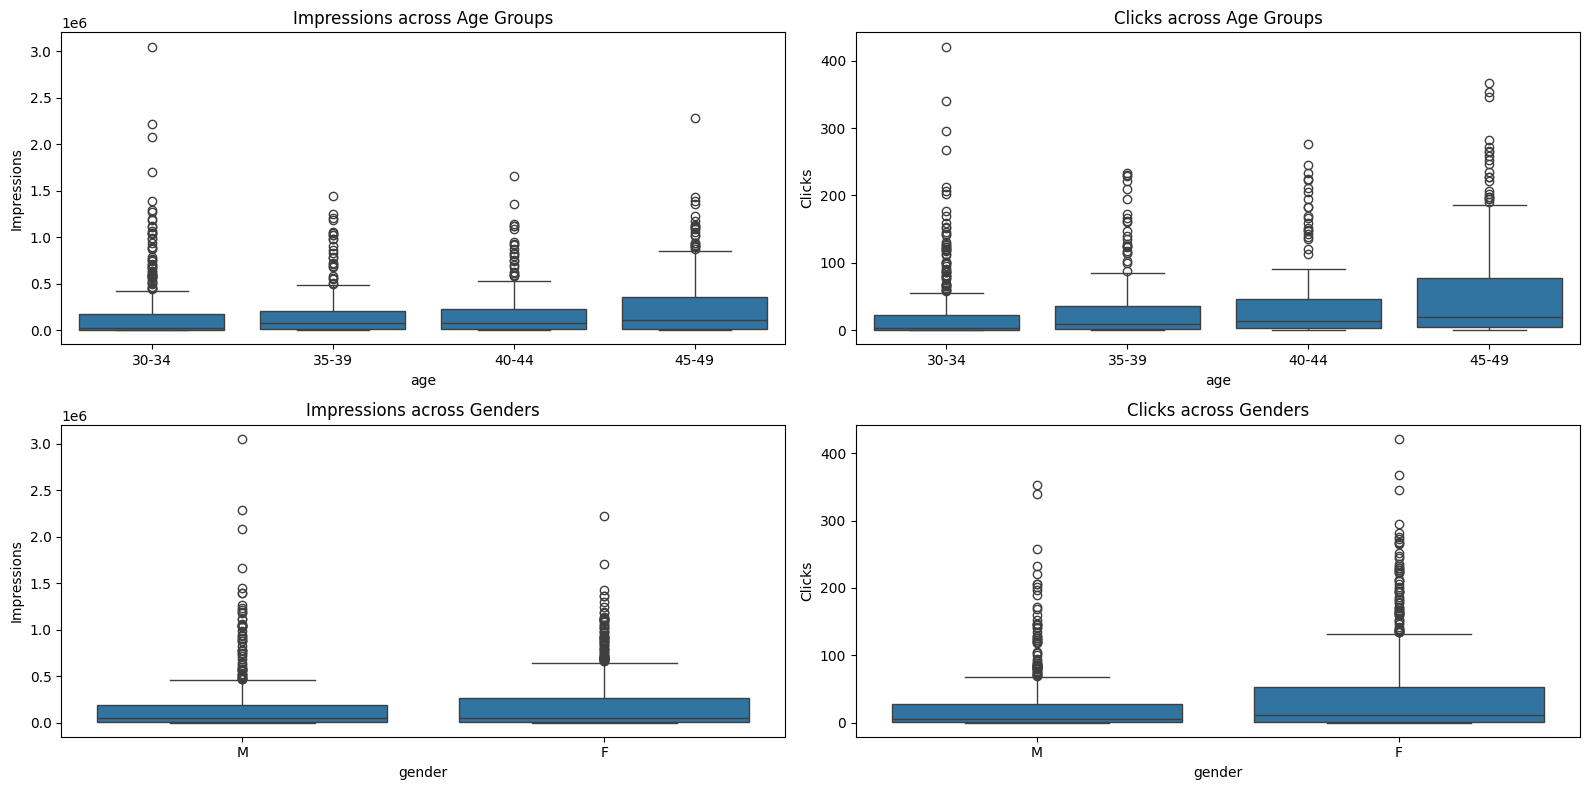

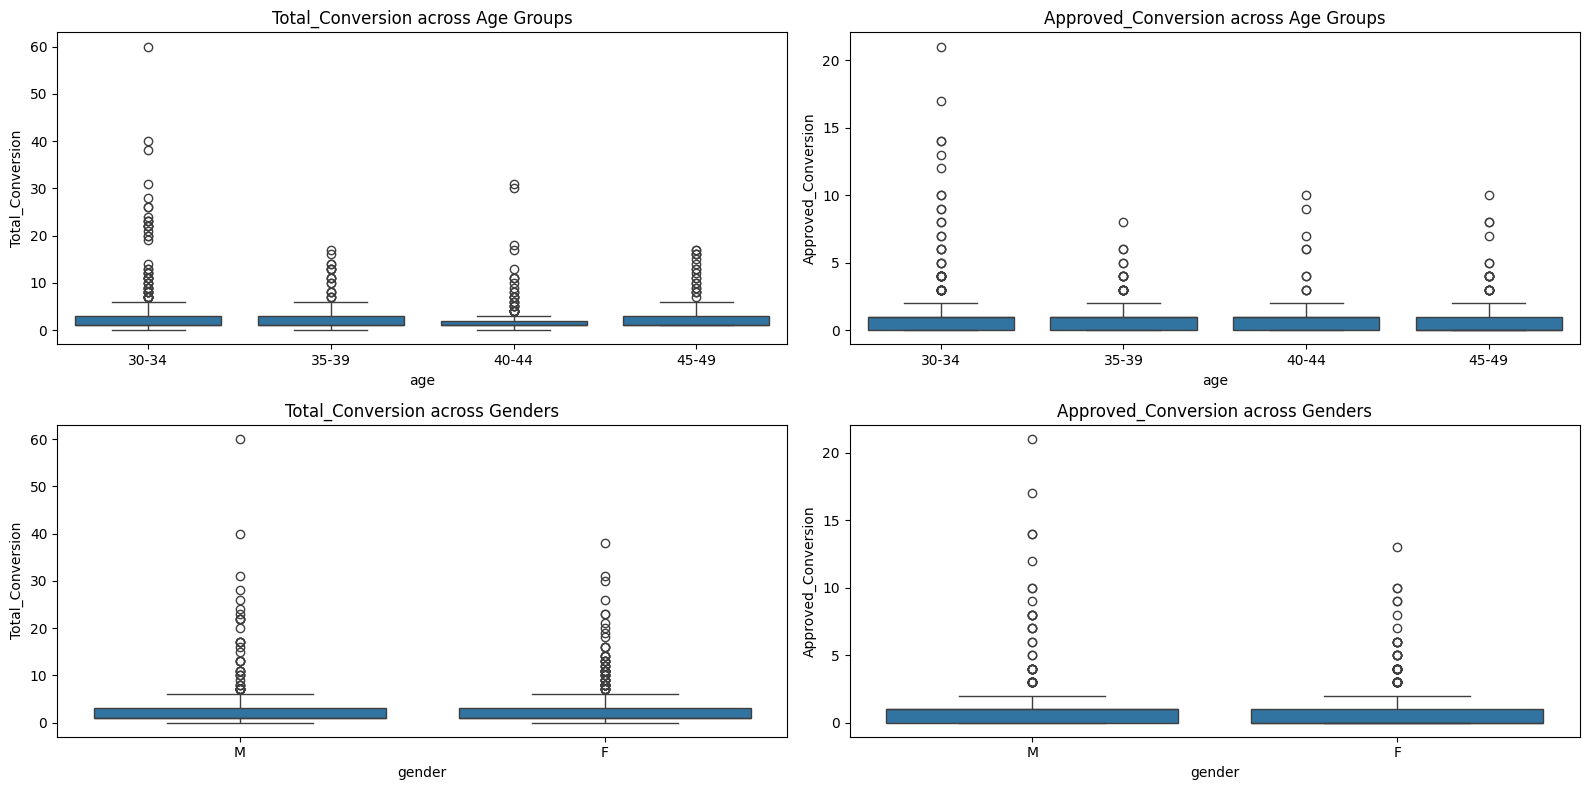

In [12]:
# Demographic Analysis - Distribution of Age and Gender
plt.figure(figsize=(16, 6))


plt.tight_layout()
plt.show()

# Demographic Analysis - Relationships with Ad Performance Metrics
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='age', y='Impressions', data=df)
plt.title('Impressions across Age Groups')

plt.subplot(2, 2, 2)
sns.boxplot(x='age', y='Clicks', data=df)
plt.title('Clicks across Age Groups')

plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='Impressions', data=df)
plt.title('Impressions across Genders')

plt.subplot(2, 2, 4)
sns.boxplot(x='gender', y='Clicks', data=df)
plt.title('Clicks across Genders')

plt.tight_layout()
plt.show()

# Demographic Analysis - Relationships with Conversions
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='age', y='Total_Conversion', data=df)
plt.title('Total_Conversion across Age Groups')

plt.subplot(2, 2, 2)
sns.boxplot(x='age', y='Approved_Conversion', data=df)
plt.title('Approved_Conversion across Age Groups')

plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='Total_Conversion', data=df)
plt.title('Total_Conversion across Genders')

plt.subplot(2, 2, 4)
sns.boxplot(x='gender', y='Approved_Conversion', data=df)
plt.title('Approved_Conversion across Genders')

plt.tight_layout()
plt.show()

#### Observations:
1). Impression and clicks across age group
- Impressions and clicks are higher for the people in group of 30 - 34 age. Following 45-49

2). Impressions and clicks across genders
- Impressions are higher in Males and clicks are higher in females

3). Total Conversion and Approved Conversion across Age Groups
- Total Coversions and approved conversions are higher for the people in group of 30 - 34 age. Following 40 - 44

4). Total Conversion and Approved Conversion across Age Genders

- Total Coversions and approved conversions are higher in Males.

### Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder
data = df

# Define the age groups
age_groups = ['30-34', '35-39', '40-44', '45-49']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Use label encoding to replace values in 'Age_Group'
data['Age_Group'] = label_encoder.fit_transform(data['age'])


# Gender Encoding
data['Gender_Code'] = data['gender'].map({'F': 0, 'M': 1})

# Interaction Features
data['Interaction_Imp_Clicks'] = data['Impressions'] * data['Clicks']

# Spent per Click
data['Spent_per_Click'] = data['Spent'] / data['Clicks']

# Total Conversion Rate
data['Total_Conversion_Rate'] = data['Total_Conversion'] / data['Clicks']

# Age-Gender Interaction
data['Age_Gender_Interaction'] = data['Age_Group'].astype(str) + '_' + data['gender']

# Conversion Rate Trends
data['Conversion_Rate_Trend'] = data['Total_Conversion'] / data['Impressions']

# Budget Allocation
data['Budget_Allocation_Imp'] = data['Spent'] / data['Impressions']
data['Budget_Allocation_Click'] = data['Spent'] / data['Clicks']

# Ad Performance Metrics
data['CTR'] = data['Clicks'] / data['Impressions']
data['Conversion_per_Impression'] = data['Total_Conversion'] / data['Impressions']

# Normalized Metrics
data['Normalized_Impressions'] = data['Impressions'] / data['Impressions'].sum()
data['Normalized_Clicks'] = data['Clicks'] / data['Clicks'].sum()
data['Normalized_Spent'] = data['Spent'] / data['Spent'].sum()

data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,Total_Conversion_Rate,Age_Gender_Interaction,Conversion_Rate_Trend,Budget_Allocation_Imp,Budget_Allocation_Click,CTR,Conversion_per_Impression,Normalized_Impressions,Normalized_Clicks,Normalized_Spent
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,...,2.0,0_M,0.000272,0.000195,1.43,0.000136,0.000272,0.000034,0.000026,0.000024
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,...,1.0,0_M,0.000112,0.000102,0.91,0.000112,0.000112,0.000084,0.000052,0.000031
2,708771,916,103920,30-34,M,20,693,0,0.00,1,...,inf,0_M,0.001443,0.000000,NaN,0.000000,0.001443,0.000003,0.000000,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,...,1.0,0_M,0.000235,0.000293,1.25,0.000235,0.000235,0.000020,0.000026,0.000021
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,...,1.0,0_M,0.000242,0.000312,1.29,0.000242,0.000242,0.000019,0.000026,0.000022


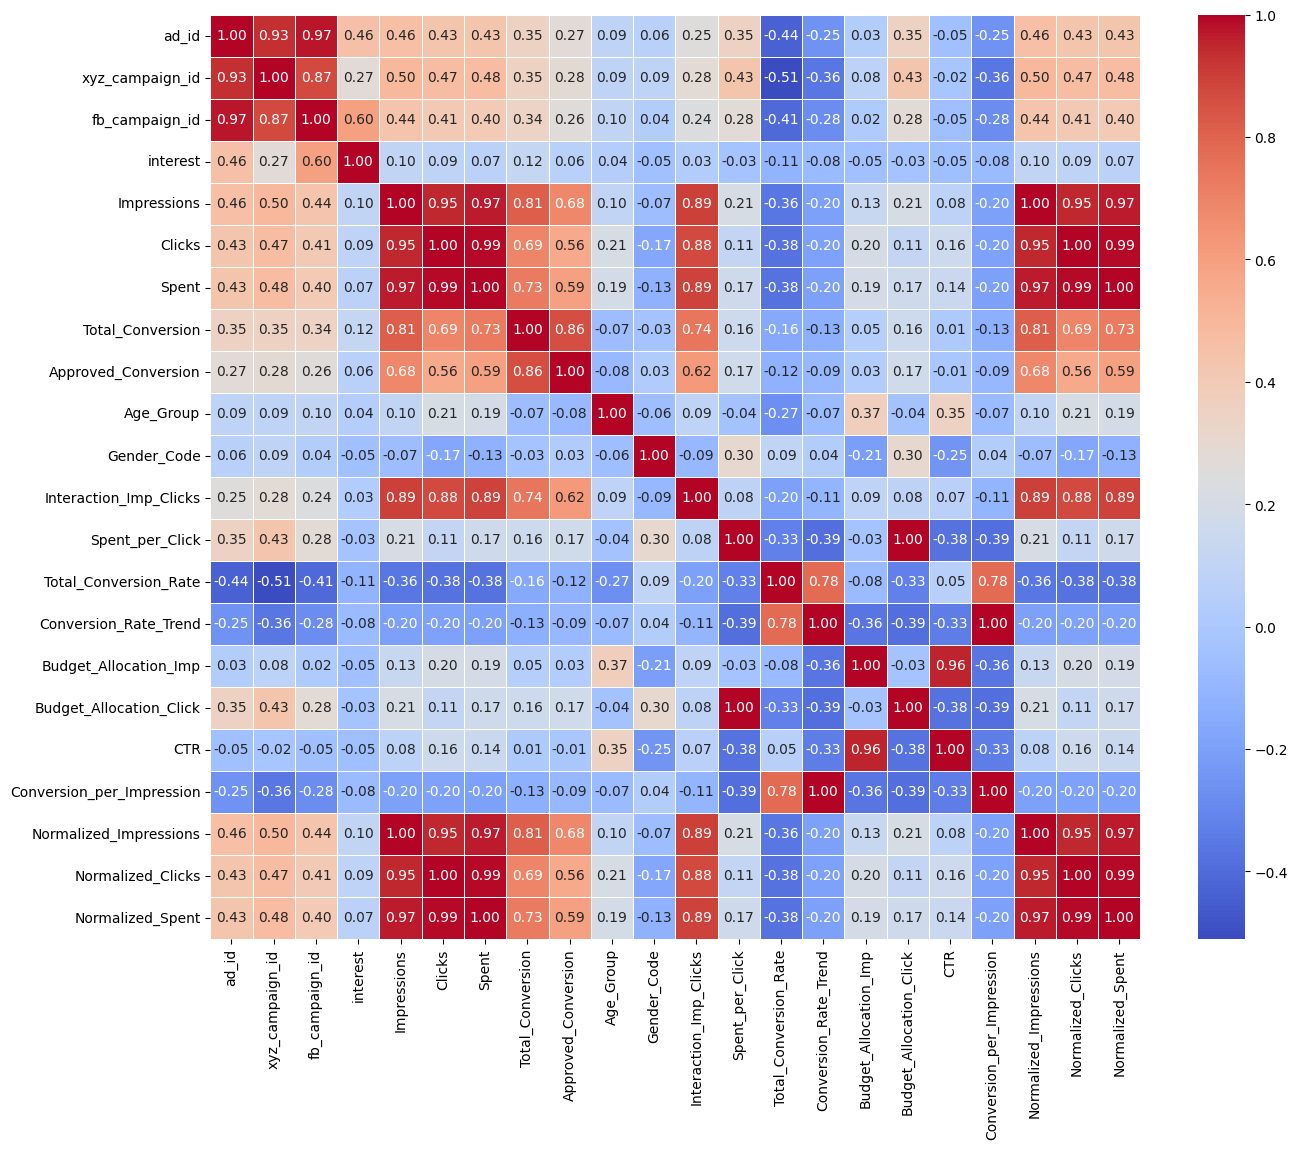

In [14]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Set the size of the heatmap
plt.figure(figsize=(15, 12))

# Create a heatmap using the correlation matrix
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the heatmap
plt.show()

**Outliers at 25th percentile**

In [15]:
cap_cols = [
    "interest", 
    "Impressions", 
    "Clicks", 
    "Spent", 
    "Total_Conversion", 
    "Approved_Conversion", 
    "Age_Group", 
    "Spent_per_Click", 
    "Total_Conversion_Rate", 
    "Conversion_Rate_Trend", 
    "Budget_Allocation_Imp", 
    "Budget_Allocation_Click", 
    "CTR", 
    "Conversion_per_Impression", 
    "Normalized_Impressions", 
    "Normalized_Clicks", 
    "Normalized_Spent"
]

for col in cap_cols:
    percentile_25 = df[col].quantile(0.25)  # Calculate the 25th percentile for the column
    print(f"{col} : {percentile_25}") # Print 25th percentile of the following column
    percentile_25_casted = df[col].dtype.type(percentile_25)  # Cast percentile_25 to match column dtype
    df.loc[df[col] < percentile_25, col] = percentile_25_casted  # Replace values below the 25th percentile



interest : 16.0
Impressions : 6503.5
Clicks : 1.0
Spent : 1.480000019
Total_Conversion : 1.0
Approved_Conversion : 0.0
Age_Group : 0.0
Spent_per_Click : 1.389999986
Total_Conversion_Rate : 0.07142857142857142
Conversion_Rate_Trend : 1.2122047502317718e-05
Budget_Allocation_Imp : 0.0001487423925369792
Budget_Allocation_Click : 1.389999986
CTR : 0.00010022166196479358
Conversion_per_Impression : 1.2122047502317718e-05
Normalized_Impressions : 3.0470659643233107e-05
Normalized_Clicks : 2.6202017555351762e-05
Normalized_Spent : 2.5210701330250833e-05


In [16]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,Total_Conversion_Rate,Age_Gender_Interaction,Conversion_Rate_Trend,Budget_Allocation_Imp,Budget_Allocation_Click,CTR,Conversion_per_Impression,Normalized_Impressions,Normalized_Clicks,Normalized_Spent
0,708746,916,103916,30-34,M,16,7350,1,1.480000,2,...,2.000000,0_M,0.000272,0.000195,1.430000,0.000136,0.000272,0.000034,0.000026,0.000025
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,...,1.000000,0_M,0.000112,0.000149,1.390000,0.000112,0.000112,0.000084,0.000052,0.000031
2,708771,916,103920,30-34,M,20,6503,1,1.480000,1,...,inf,0_M,0.001443,0.000149,NaN,0.000100,0.001443,0.000030,0.000026,0.000025
3,708815,916,103928,30-34,M,28,6503,1,1.480000,1,...,1.000000,0_M,0.000235,0.000293,1.390000,0.000235,0.000235,0.000030,0.000026,0.000025
4,708818,916,103928,30-34,M,28,6503,1,1.480000,1,...,1.000000,0_M,0.000242,0.000312,1.390000,0.000242,0.000242,0.000030,0.000026,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,...,0.071429,3_F,0.000012,0.000317,1.421389,0.000223,0.000012,0.005293,0.006603,0.006102
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,...,0.071429,3_F,0.000012,0.000273,1.449000,0.000188,0.000012,0.002987,0.003144,0.002962
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,...,0.071429,3_F,0.000013,0.000266,1.438929,0.000185,0.000013,0.000710,0.000734,0.000686
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,...,0.071429,3_F,0.000012,0.000251,1.471926,0.000171,0.000012,0.003703,0.003537,0.003385


In [17]:
df.shape

(1143, 25)

* Don’t manipulate or focus on values above the 75th percentile as they are essential for understanding higher sales counts. Consider these as part of the natural distribution.

* Replacing values below the 25th percentile do not affect the nature of data, because the sale count at below 25th percentile is 0.